![image.png](https://i.imgur.com/a3uAqnb.png)

# **⚡ Wind Turbine Object Detection with YOLOv8**
In this lab, we will:
✅ **Use YOLOv8** for **wind turbine detection**  
✅ **Understand the dataset structure**  
✅ **Train a YOLOv8 model**  
✅ **Evaluate the model on the validation set**  
✅ **Run inference on test images**  

---

## **1️⃣ Understanding the Dataset Structure**
The dataset follows the **YOLO format**, which consists of:
📂 **train/** → Training images & labels  
📂 **valid/** → Validation images & labels  
📂 **test/** → Test images (for inference)  
📜 **data.yaml** → Defines dataset paths & class names  

### **🔹 YOLO Dataset Folder Structure**
```
drone_dataset/
│── train/
│   │── images/
│   │   ├── pic_031.jpg
│   │   ├── pic_032.jpg
│   │   ├── ...
│   │── labels/
│   │   ├── pic_031.txt
│   │   ├── pic_032.txt
│   │   ├── ...
│
│── valid/
│   │── images/
│   │   ├── pic_035.jpg
│   │   ├── pic_036.jpg
│   │   ├── ...
│   │── labels/
│   │   ├── pic_035.txt
│   │   ├── pic_036.txt
│   │   ├── ...
│
│── test/
│   │── images/
│   │   ├── pic_040.jpg
│   │   ├── pic_041.jpg
│   │   ├── ...
│   │── labels/
│   │   ├── pic_040.txt
│   │   ├── pic_041.txt
│   │   ├── ...
│
│── data.yaml
```
Each **image** has a **corresponding label** file with the **same name**, but a `.txt` extension.

---

## **2️⃣ What’s Inside a YOLO Label File?**
Each `.txt` file contains **annotations** in this format:

```
<class_id> <x_center> <y_center> <width> <height>
```

✅ **All values are normalized** between **0 and 1**  
✅ The **bounding box** is defined by its **center** and **size**  

### **🔹 Example (`pic_031.txt`)**
```
0 0.526 0.448 0.12 0.15
1 0.731 0.602 0.18 0.22
```
- **First column** → Class ID (`0` = cable tower, `1` = turbine)  
- **Rest** → Bounding box (normalized)  

---

## **3️⃣ Loading the Dataset**

In [14]:
import kagglehub

# Download the dataset
path = kagglehub.dataset_download("kylegraupe/wind-turbine-image-dataset-for-computer-vision")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/wind-turbine-image-dataset-for-computer-vision


In [15]:
# Load dataset configuration
dataset_path = path + "/data.yaml"

# Check dataset information
print(open(dataset_path).read())

train: ../train/images
val: ../valid/images
test: ../test/images

nc: 2
names: ['cable tower', 'turbine']

roboflow:
  workspace: kyle-graupe-jobhn
  project: wind-farms
  version: 5
  license: CC BY 4.0
  url: https://universe.roboflow.com/kyle-graupe-jobhn/wind-farms/dataset/5


## **4️⃣ Training a YOLOv8 Model**
We will fine-tune a **pretrained YOLOv8 model**.

In [18]:
# Install Ultralytics library which has Yolo 
!pip install -q ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 914.9/914.9 kB 41.5 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
# Load YOLOv8 model (small version)
model = YOLO("yolov8s.pt")

#### Let's try to predict an image before training


image 1/1 /kaggle/input/wind-turbine-image-dataset-for-computer-vision/test/images/windmill1_jpg.rf.35f47a69d0373596edb7578eea5151f6.jpg: 384x640 3 sheeps, 5 cows, 8.2ms
Speed: 2.3ms preprocess, 8.2ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict


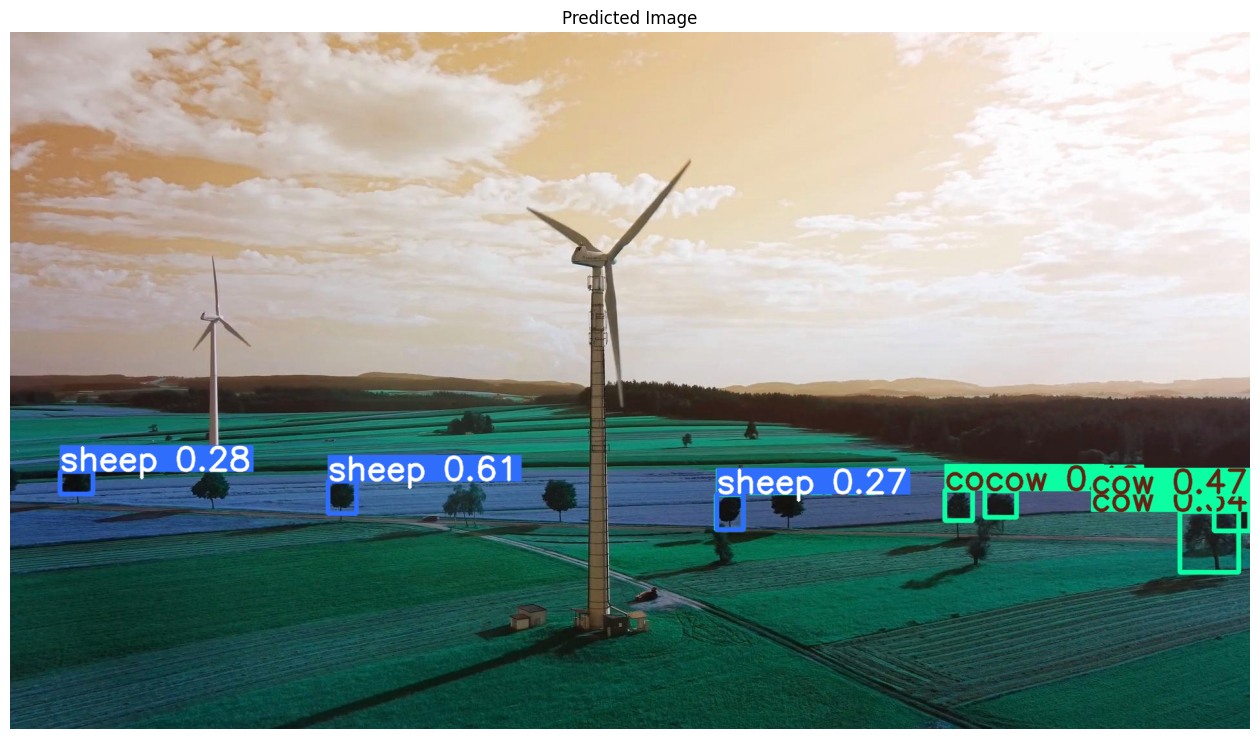

In [43]:
# Load an image and run inference
results = model(path + "/test/images/windmill1_jpg.rf.35f47a69d0373596edb7578eea5151f6.jpg", save=True)

# Convert result to a NumPy array and display
predicted_image = results[0].plot()  # Convert prediction to an image

plt.figure(figsize=(16, 16))
plt.imshow(predicted_image)
plt.axis("off")
plt.title("Predicted Image")
plt.show()


## OMG, AI will take over the world.🫠
#### -Ali H 2/2/2025 at 11:06PM

#### Nevermind, let's train it! 🚀

In [19]:
# Train on the wind turbine dataset
model.train(data=dataset_path, epochs=20, imgsz=640)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 21.5M/21.5M [00:00<00:00, 47.9MB/s]


Ultralytics 8.3.70 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/kaggle/input/wind-turbine-image-dataset-for-computer-vision/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_

100%|██████████| 755k/755k [00:00<00:00, 45.3MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 382MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/input/wind-turbine-image-dataset-for-computer-vision/train/labels... 2643 images, 15 backgrounds, 0 corrupt: 100%|██████████| 2643/2643 [00:12<00:00, 215.81it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/wind-turbine-image-dataset-for-computer-vision/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.2 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /kaggle/input/wind-turbine-image-dataset-for-computer-vision/valid/labels... 247 images, 1 backgrounds, 0 corrupt: 100%|██████████| 247/247 [00:01<00:00, 188.28it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/wind-turbine-image-dataset-for-computer-vision/valid is not writeable, cache not saved.


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      4.63G      1.115      1.126      1.089         34        640: 100%|██████████| 166/166 [00:52<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.77it/s]

                   all        247       1562      0.512      0.347      0.306      0.124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      4.62G     0.8857     0.6358     0.9621         22        640: 100%|██████████| 166/166 [00:51<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.67it/s]

                   all        247       1562       0.46      0.303      0.308     0.0912



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20       4.6G     0.8511     0.5921     0.9459         39        640: 100%|██████████| 166/166 [00:51<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.70it/s]

                   all        247       1562      0.563      0.453      0.543       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      4.57G     0.8123     0.5357     0.9317         14        640: 100%|██████████| 166/166 [00:50<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.73it/s]

                   all        247       1562      0.571      0.552       0.54      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      4.59G     0.7547     0.4936     0.9124         52        640: 100%|██████████| 166/166 [00:50<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.90it/s]

                   all        247       1562      0.733      0.504      0.617      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      4.58G     0.7207     0.4711     0.8996         27        640: 100%|██████████| 166/166 [00:50<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.89it/s]

                   all        247       1562      0.548      0.656      0.597      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      4.59G     0.6937     0.4441     0.8904         35        640: 100%|██████████| 166/166 [00:50<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.73it/s]

                   all        247       1562        0.6      0.618      0.613      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      4.58G     0.6694     0.4283     0.8837         33        640: 100%|██████████| 166/166 [00:50<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.98it/s]


                   all        247       1562      0.534      0.598      0.577       0.27

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20       4.6G     0.6467     0.4118     0.8745         27        640: 100%|██████████| 166/166 [00:50<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.89it/s]

                   all        247       1562      0.744       0.56      0.631       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      4.58G     0.6287     0.3959     0.8707         35        640: 100%|██████████| 166/166 [00:50<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.73it/s]

                   all        247       1562      0.791      0.708      0.774      0.376


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      4.59G     0.6507     0.3906     0.8623         16        640: 100%|██████████| 166/166 [00:51<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.96it/s]

                   all        247       1562      0.763      0.663      0.744      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      4.58G      0.642     0.3794     0.8559         15        640: 100%|██████████| 166/166 [00:50<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.81it/s]

                   all        247       1562      0.643      0.593      0.646      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      4.59G     0.6168     0.3686     0.8516         14        640: 100%|██████████| 166/166 [00:50<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.85it/s]

                   all        247       1562      0.738      0.598      0.723      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      4.58G     0.5932     0.3519     0.8456         20        640: 100%|██████████| 166/166 [00:50<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.68it/s]

                   all        247       1562      0.742      0.619       0.69      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20       4.6G     0.5779     0.3421     0.8388         24        640: 100%|██████████| 166/166 [00:50<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.85it/s]

                   all        247       1562      0.857      0.649      0.763      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      4.58G     0.5529      0.326     0.8336         26        640: 100%|██████████| 166/166 [00:50<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.79it/s]

                   all        247       1562      0.827      0.688      0.764      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20       4.6G     0.5355     0.3161      0.829          8        640: 100%|██████████| 166/166 [00:50<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.85it/s]

                   all        247       1562      0.784      0.659      0.718       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      4.57G     0.5189     0.3051     0.8257         22        640: 100%|██████████| 166/166 [00:50<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.58it/s]

                   all        247       1562      0.535      0.726      0.626      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      4.61G     0.4914     0.2914     0.8169         18        640: 100%|██████████| 166/166 [00:50<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.77it/s]

                   all        247       1562      0.739      0.594      0.688      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      4.58G     0.4794     0.2837     0.8161         13        640: 100%|██████████| 166/166 [00:50<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.95it/s]

                   all        247       1562      0.806       0.58      0.708      0.418



20 epochs completed in 0.298 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 22.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.70 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 168 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.62it/s]


                   all        247       1562      0.807      0.582      0.707      0.419
           cable tower          7         24      0.764      0.404      0.553      0.283
               turbine        239       1538       0.85      0.759      0.862      0.556


/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.1ms preprocess, 2.8ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ae1a3845db0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

## **5️⃣ Evaluating the Model**
We use **mAP@0.5:0.95** to assess performance. 

In [41]:
# Run validation
metrics = model.val(data=dataset_path)

Ultralytics 8.3.70 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)


val: Scanning /kaggle/input/wind-turbine-image-dataset-for-computer-vision/valid/labels... 247 images, 1 backgrounds, 0 corrupt: 100%|██████████| 247/247 [00:00<00:00, 494.20it/s]


val: WARNING ⚠️ Cache directory /kaggle/input/wind-turbine-image-dataset-for-computer-vision/valid is not writeable, cache not saved.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.14it/s]


                   all        247       1562      0.801      0.612      0.708       0.42
           cable tower          7         24      0.761      0.458      0.553      0.285
               turbine        239       1538       0.84      0.767      0.864      0.556


/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.1ms preprocess, 3.4ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs/detect/train13


## **6️⃣ Running Inference on Test Images**



image 1/1 /kaggle/input/wind-turbine-image-dataset-for-computer-vision/test/images/windmill1_jpg.rf.35f47a69d0373596edb7578eea5151f6.jpg: 384x640 2 turbines, 8.1ms
Speed: 2.1ms preprocess, 8.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/train12


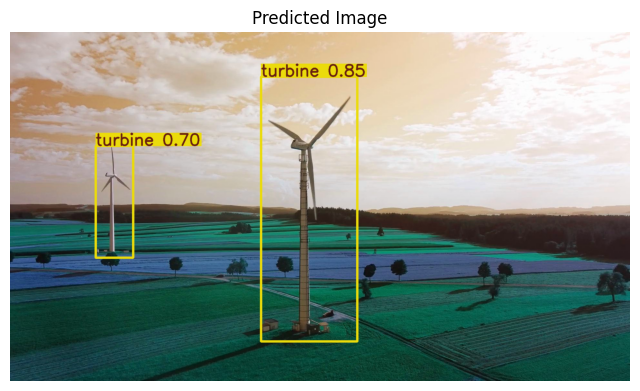

In [38]:
# Load an image and run inference
results = model(path + "/test/images/windmill1_jpg.rf.35f47a69d0373596edb7578eea5151f6.jpg", save=True)

# Convert result to a NumPy array and display
predicted_image = results[0].plot()  # Convert prediction to an image

plt.figure(figsize=(8, 8))
plt.imshow(predicted_image)
plt.axis("off")
plt.title("Predicted Image")
plt.show()


### 🚀 **Now you have a working YOLOv8 object detection pipeline for wind turbines!**

![image.png](https://i.imgur.com/rGGLEsK.png)

### Contributed by: Ali Habibullah & Mohamed Eltayeb